In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
#plt.style.use('fivethirtyeight')
import warnings
warnings.warn('ignore')
%matplotlib inline

<ipython-input-1-3f58c650ff1e>:17: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
df = pd.read_csv('C:/Users/goodluck/Downloads/data_stocks.csv')

In [3]:
df.head(8)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.3700,119.035,44.40,39.88,82.0300,7.360,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.3700,119.035,44.11,39.88,82.0300,7.380,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.5850,119.260,44.09,39.98,82.0200,7.360,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.4600,119.260,44.25,39.99,82.0200,7.350,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.4700,119.610,44.11,39.96,82.0300,7.360,50.20,63.91,121.695,53.240
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.70,...,84.4825,119.580,44.15,39.96,82.0300,7.360,50.20,63.84,121.850,53.220
6,1491226560,2365.2000,42.4700,143.8640,130.1800,82.120,102.3300,85.9120,59.540,121.63,...,84.5000,119.320,44.20,39.98,82.0566,7.365,50.33,63.83,122.100,53.330
7,1491226620,2365.2900,42.4700,143.8100,130.1400,82.190,102.3700,85.8200,59.410,121.61,...,84.5200,119.110,44.12,39.95,82.0000,7.360,50.30,63.83,122.280,53.370


In [5]:
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stock_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         41266 non-null  int64  
 1   NASDAQ.AAPL  41266 non-null  float64
 2   NASDAQ.ADP   41266 non-null  float64
 3   NASDAQ.CBOE  41266 non-null  float64
 4   NASDAQ.CSCO  41266 non-null  float64
 5   NASDAQ.EBAY  41266 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [7]:
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [8]:
df1 =df1.copy()
df1['DATE'] = pd.to_datetime(df1['DATE'],unit='s')

In [9]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [10]:
df1.tail()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,2017-08-31 19:56:00,164.11,106.565,100.89,32.185,36.135
41262,2017-08-31 19:57:00,164.12,106.590,100.88,32.200,36.130
41263,2017-08-31 19:58:00,164.01,106.520,100.86,32.200,36.130
41264,2017-08-31 19:59:00,163.88,106.400,100.83,32.195,36.120
41265,2017-08-31 20:00:00,163.98,106.470,100.89,32.225,36.130


In [11]:
df1 = df1.copy()
df1['Month'] = df1['DATE'].dt.date

In [12]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [13]:
col_list = ['Month']+ stock_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [14]:
df2.isnull().sum()

Month          0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [15]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [16]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])

In [17]:
# Time Series Forecasting for NASDAQ.AAPL
df_AAPL = final[['Month',stock_features[0]]]
df_AAPL.head()

,Month,NASDAQ.AAPL
0,2017-04-03,143.6800
1,2017-04-03,143.7000
2,2017-04-03,143.6901
3,2017-04-03,143.6400
4,2017-04-03,143.6600


In [18]:
df_AAPL.set_index('Month',inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


In [19]:
df_AAPL.index

DatetimeIndex(['2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

In [20]:
# Lets review the vital stats
df_AAPL.describe()

,NASDAQ.AAPL
count,41266.000000
mean,150.453566
std,6.236826
min,140.160000
25%,144.640000
50%,149.945000
75%,155.065000
max,164.510000


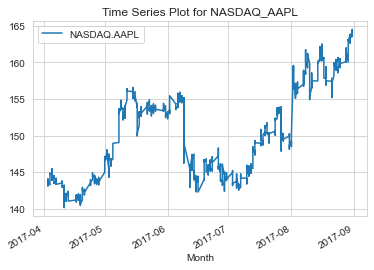

In [21]:
# Now lets visualize the data
import seaborn as sns
sns.set_style('whitegrid')
df_AAPL.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

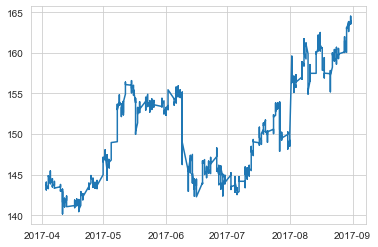

In [36]:
plt.plot(df_AAPL['NASDAQ.AAPL'])

In [39]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference
Month,,
2017-04-03,143.6800,0.0
2017-04-03,143.7000,0.0
2017-04-03,143.6901,0.0
2017-04-03,143.6400,0.0
2017-04-03,143.6600,0.0


In [40]:
df_AAPL = df_AAPL.copy()
df_AAPL.dropna(inplace=True)

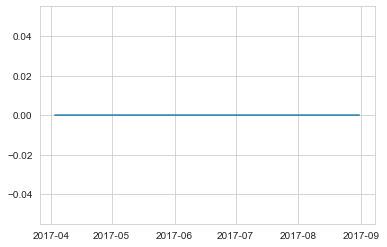

In [42]:
plt.plot(df_AAPL['First_Difference'])

<ipython-input-43-b6c66e332c8f>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],freq=12)


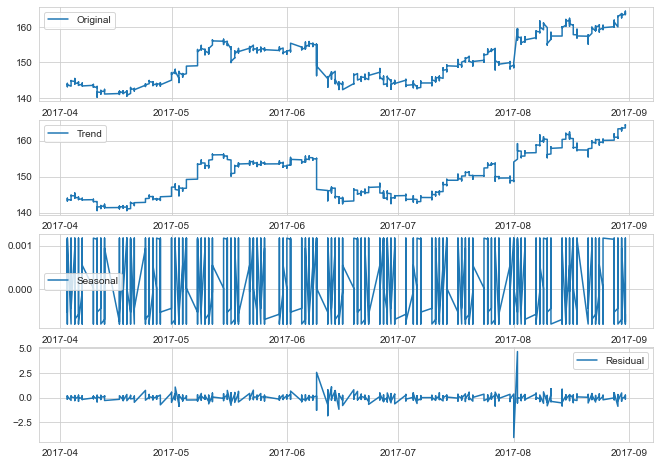

In [43]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

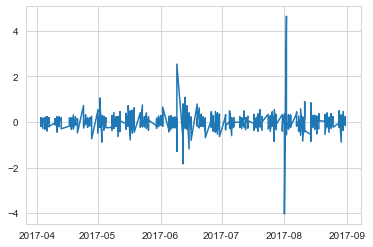

In [46]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.plot(ts_log_decompose)

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:672: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\goodluck\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<Figure size 1440x576 with 0 Axes>

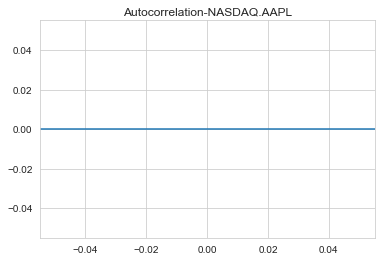

In [49]:
plt.figure(figsize=(20,8))
fig_first = plot_acf(df_AAPL["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')

C:\Users\goodluck\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

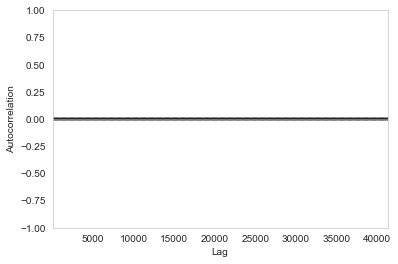

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['First_Difference'])

In [54]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [60]:
lag_acf = acf(df_AAPL['First_Difference'],nlags=80)
lag_pacf = pacf(df_AAPL['First_Difference'],nlags=80,method='ols')

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:672: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


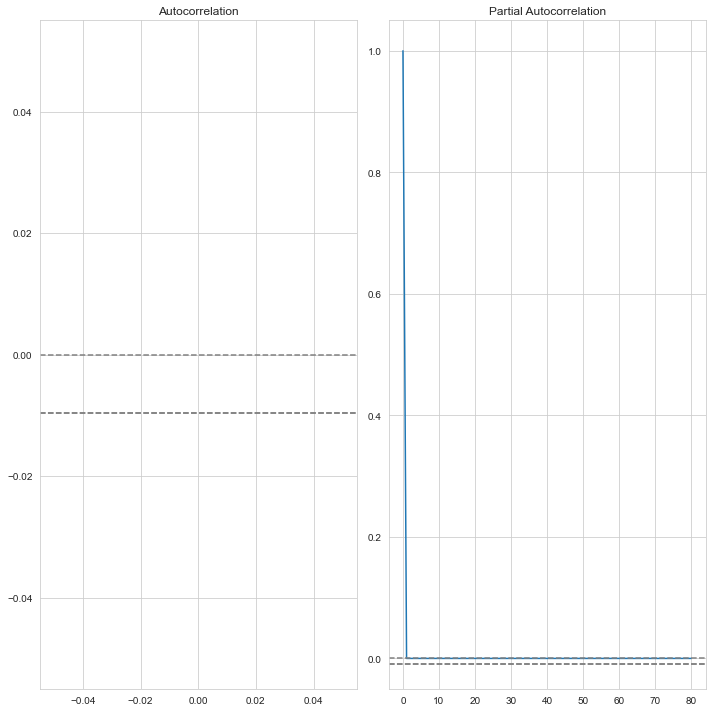

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

In [63]:
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0
,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41266
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24926.454
Date:                            Fri, 26 Mar 2021   AIC                         -49850.909
Time:                                    17:25:58   BIC                         -49842.281
Sample:                                         0   HQIC                        -49848.182
                                          - 41266                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.766      0.000       0.017       0.017
Ljung-Box (L1) (Q):                

<AxesSubplot:xlabel='Month'>

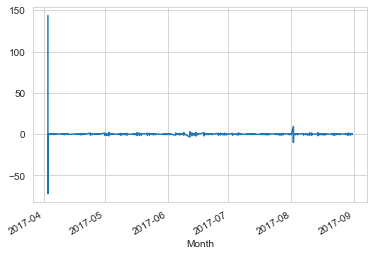

In [64]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

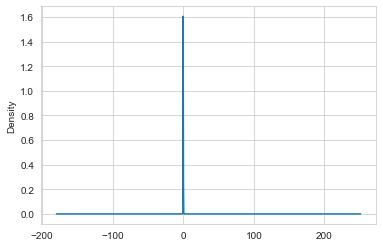

In [66]:
results.resid.plot(kind='kde')

In [67]:
df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()

In [68]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
2017-04-03,143.6800,0.0,0.0000
2017-04-03,143.7000,0.0,143.6800
2017-04-03,143.6901,0.0,143.7000
2017-04-03,143.6400,0.0,143.6901
2017-04-03,143.6600,0.0,143.6400


<AxesSubplot:xlabel='Month'>

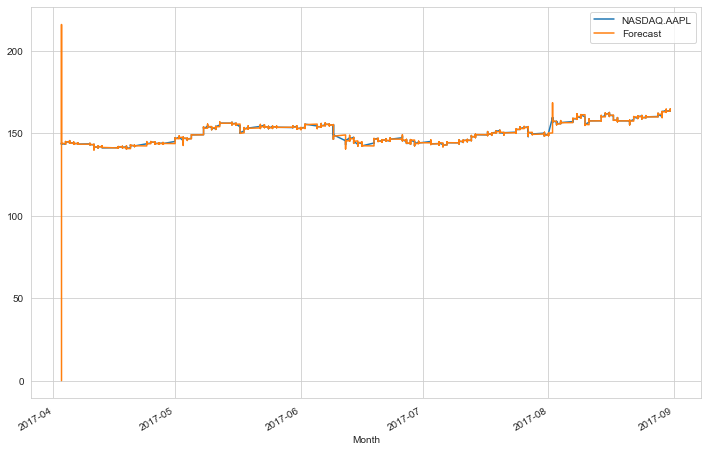

In [69]:
# Prediction of future values
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [70]:
results.forecast(steps=10)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41266    163.960
41267    163.935
41268    163.910
41269    163.810
41270    163.940
41271    163.950
41272    163.890
41273    163.860
41274    163.870
41275    163.760
Name: predicted_mean, dtype: float64

In [71]:
results.predict(start=41264,end=41274)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    164.055
41265    163.930
41266    163.960
41267    163.935
41268    163.910
41269    163.810
41270    163.940
41271    163.950
41272    163.890
41273    163.860
41274    163.870
Name: predicted_mean, dtype: float64

In [76]:
# Accuracy of the Forecast using MSE-Mean Squared Error
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6429876604305997
Mean Absolute Error NASDAQ.AAPL - 0.0755097658813368


In [77]:
# Time Series Forecasting for NASDAQ.ADP
df_ADP = final[['Month',stock_features[1]]]
df_ADP.head()

,Month,NASDAQ.ADP
0,2017-04-03,102.2300
1,2017-04-03,102.1400
2,2017-04-03,102.2125
3,2017-04-03,102.1400
4,2017-04-03,102.0600


In [78]:
df_ADP.set_index('Month',inplace=True)
df_ADP.head()

,NASDAQ.ADP
Month,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600


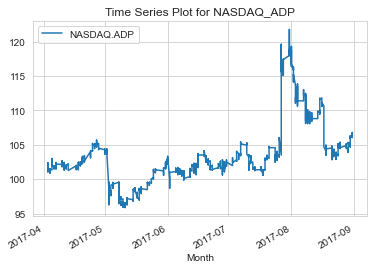

In [79]:
# Visualize data
df_ADP.plot()
plt.title('Time Series Plot for NASDAQ_ADP')
plt.show()

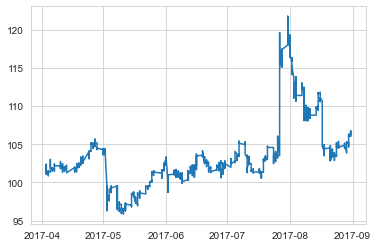

In [84]:
plt.plot(df_ADP['NASDAQ.ADP'])

In [85]:
# We need to make the time series stationary
df_ADP = df_ADP.copy()
df_ADP['First_Difference'] = df_ADP['NASDAQ.ADP'] - df_ADP['NASDAQ.ADP'].shift(1)
df_ADP.head()

,NASDAQ.ADP,First_Difference
Month,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


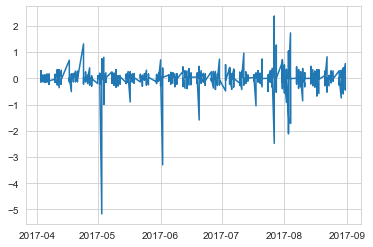

In [87]:
df_ADP.dropna(inplace=True)
plt.plot(df_ADP['First_Difference'])
#Now subtract the rolling mean from the original serie

<ipython-input-88-376f839ccd71>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_ADP['First_Difference'],freq=12)


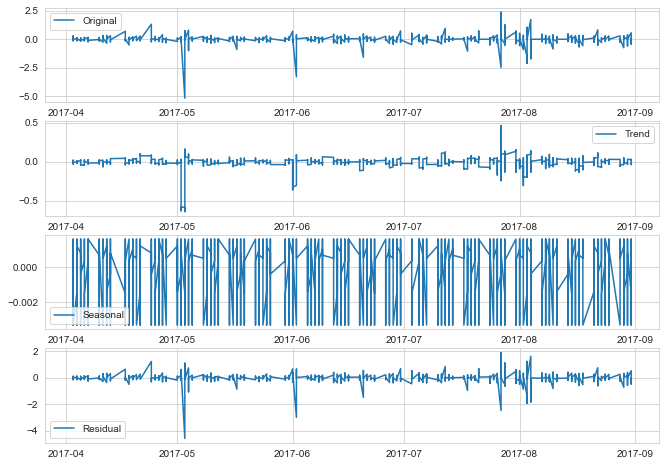

In [88]:
# Seasonal decompostion
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_ADP['First_Difference'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_ADP['First_Difference'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

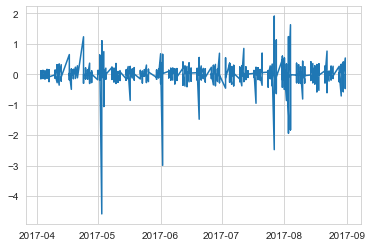

In [90]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.plot(ts_log_decompose)

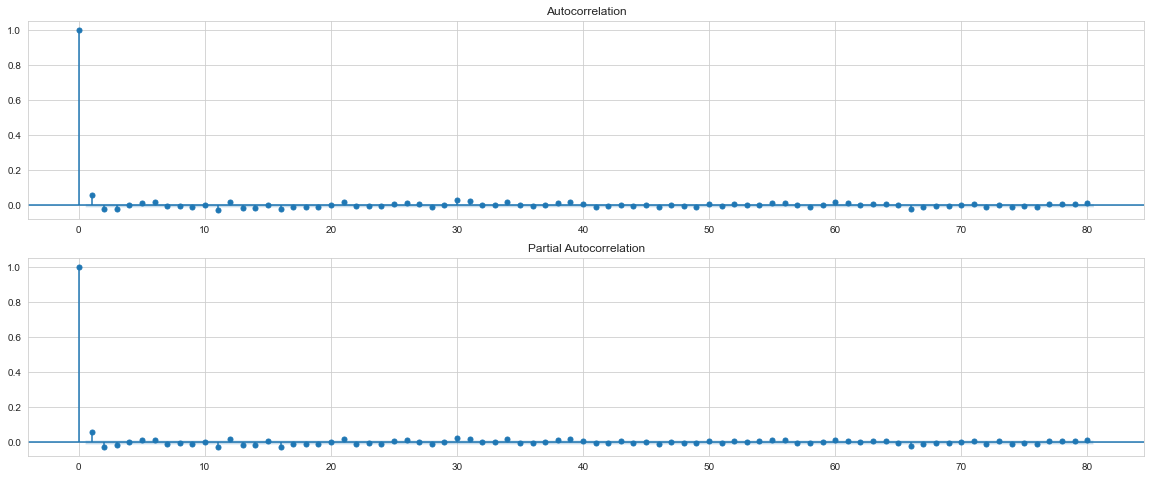

In [91]:
# Autocorrelation and Partial Corelation plot
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax2)

In [92]:
lag_acf = acf(df_ADP['First_Difference'],nlags=80)
lag_pacf = pacf(df_ADP['First_Difference'],nlags=80,method='ols')

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation')

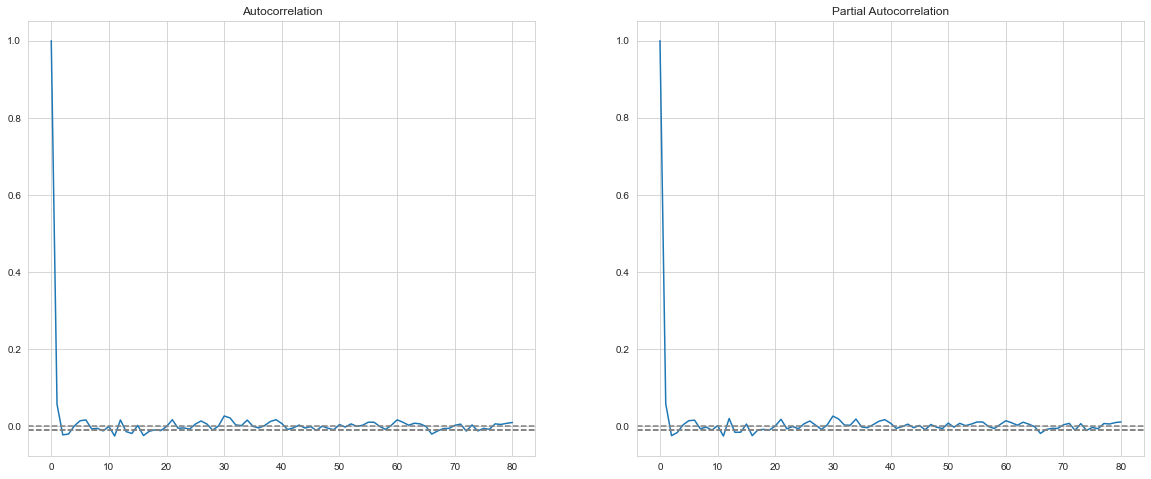

In [95]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')

In [97]:
model= sm.tsa.statespace.SARIMAX(df_ADP['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1
,0,12))
results = model.fit()
print(results.summary())

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Fri, 26 Mar 2021   AIC                         -69464.026
Time:                                    17:36:22   BIC                         -69455.398
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.708      0.000       0.011       0.011
Ljung-Box (L1) (Q):                

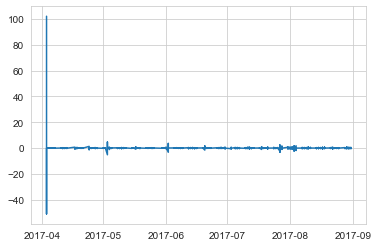

In [98]:
plt.plot(results.resid)

<AxesSubplot:ylabel='Density'>

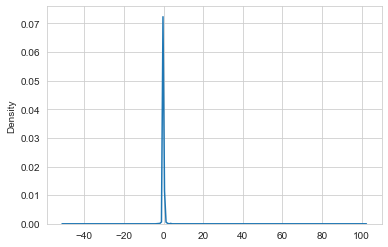

In [99]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(results.resid)

In [102]:
df_ADP['Forecast'] = results.predict()

In [101]:
df_ADP[['NASDAQ.ADP','Forecast']].tail()

,NASDAQ.ADP,Forecast
Month,,
2017-08-31,106.565,106.705
2017-08-31,106.590,106.525
2017-08-31,106.520,106.510
2017-08-31,106.400,106.480
2017-08-31,106.470,106.430


In [104]:
results.forecast(steps=10)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
Name: predicted_mean, dtype: float64

In [105]:
results.predict(start=41264,end=41275)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    106.430
41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
41275    106.220
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

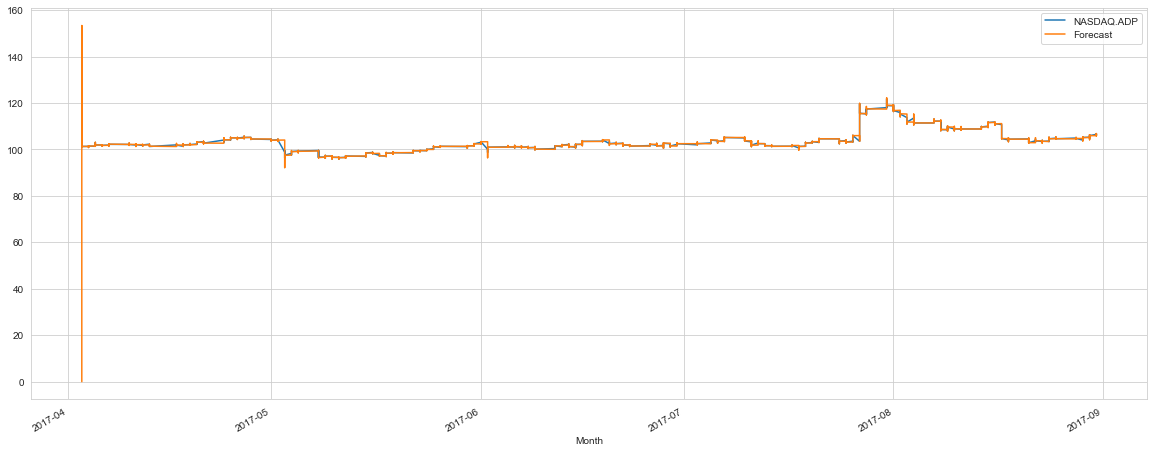

In [106]:
df_ADP[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.3267938113132823
Mean Absolute Error NASDAQ.AAPL - 0.05339673816260977


       Month  NASDAQ.CBOE
0 2017-04-03        81.03
1 2017-04-03        81.21
2 2017-04-03        81.21
3 2017-04-03        81.13
4 2017-04-03        81.12
            NASDAQ.CBOE
Month                  
2017-04-03        81.03
2017-04-03        81.21
2017-04-03        81.21
2017-04-03        81.13
2017-04-03        81.12


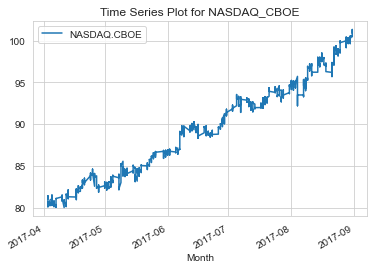

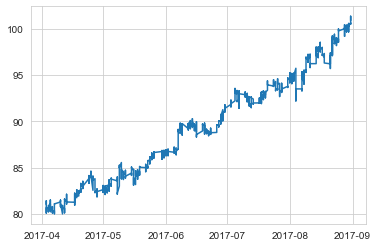

In [111]:
# Times Series Forecasting for 'NASDAQ.CBOE'
df_CBOE= final[['Month',stock_features[2]]]
print(df_CBOE.head())
df_CBOE.set_index('Month',inplace=True)
print(df_CBOE.head())
df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
plt.plot(df_CBOE['NASDAQ.CBOE'])

       Month  NASDAQ.CBOE
0 2017-04-03        81.03
1 2017-04-03        81.21
2 2017-04-03        81.21
3 2017-04-03        81.13
4 2017-04-03        81.12
            NASDAQ.CBOE
Month                  
2017-04-03        81.03
2017-04-03        81.21
2017-04-03        81.21
2017-04-03        81.13
2017-04-03        81.12


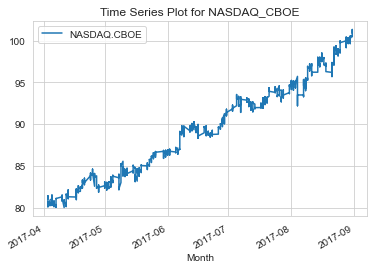

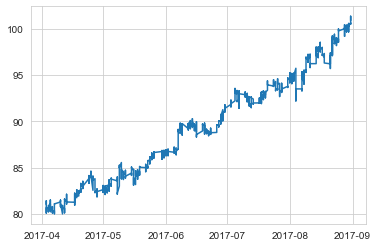

In [113]:
# Times Series Forecasting for 'NASDAQ.CBOE'
df_CBOE= final[['Month',stock_features[2]]]
print(df_CBOE.head())
df_CBOE.set_index('Month',inplace=True)
print(df_CBOE.head())
df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
plt.plot(df_CBOE['NASDAQ.CBOE'])

In [114]:
# Making the time series data stationary
df_CBOE = df_CBOE.copy()

In [115]:
df_CBOE.head()

,NASDAQ.CBOE
Month,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12


In [116]:
df_CBOE['First_Difference'] = df_CBOE['NASDAQ.CBOE'] - df_CBOE['NASDAQ.CBOE'].shift(1)
df_CBOE.head()

,NASDAQ.CBOE,First_Difference
Month,,
2017-04-03,81.03,NaN
2017-04-03,81.21,0.18
2017-04-03,81.21,0.00
2017-04-03,81.13,-0.08
2017-04-03,81.12,-0.01


In [117]:
df_CBOE.dropna(inplace=True)

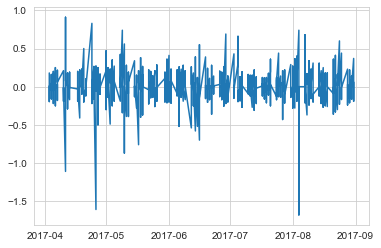

In [118]:
plt.plot(df_CBOE['First_Difference'])

<ipython-input-119-5c3810b0388f>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'],freq=12)


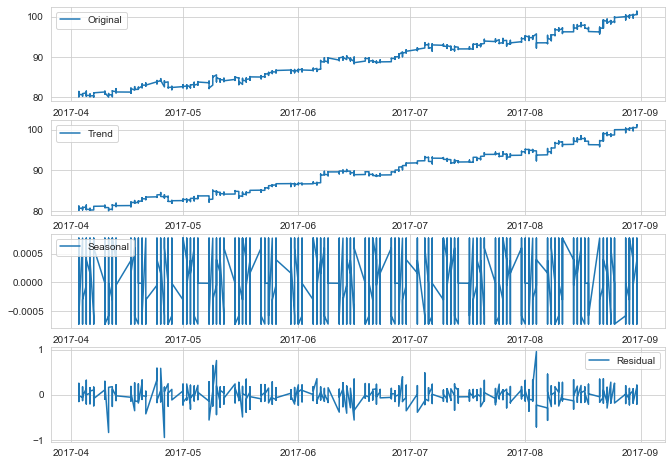

In [119]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CBOE['NASDAQ.CBOE'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

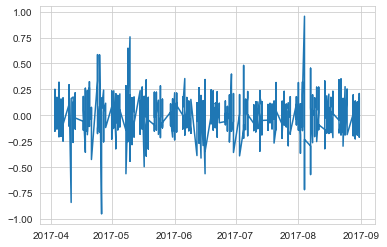

In [121]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.plot(ts_log_decompose)

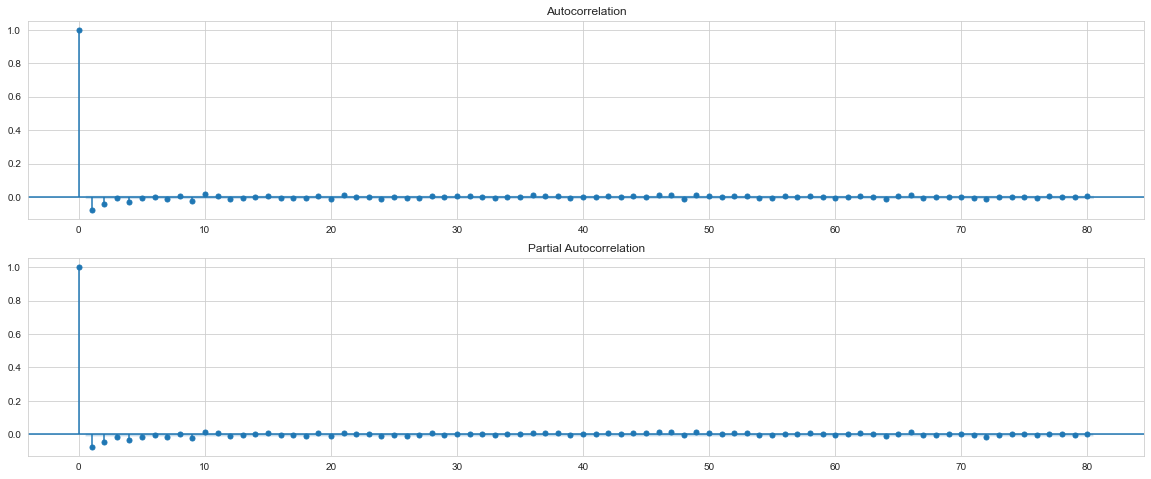

In [122]:
# Autocorrelation and Partial Corelation plot
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax2)

In [123]:
lag_acf = acf(df_CBOE['First_Difference'],nlags=80)
lag_pacf = pacf(df_CBOE['First_Difference'],nlags=80,method='ols')

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


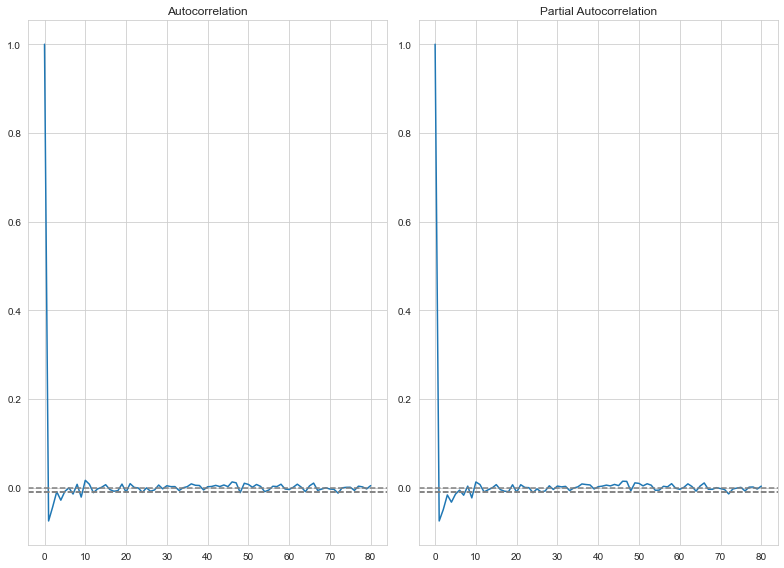

In [125]:
plt.figure(figsize=(11,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Fri, 26 Mar 2021   AIC                        -106826.184
Time:                                    17:44:11   BIC                        -106817.557
Sample:                                         0   HQIC                       -106823.457
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.255      0.000       0.004       0.004
Ljung-Box (L1) (Q):                

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


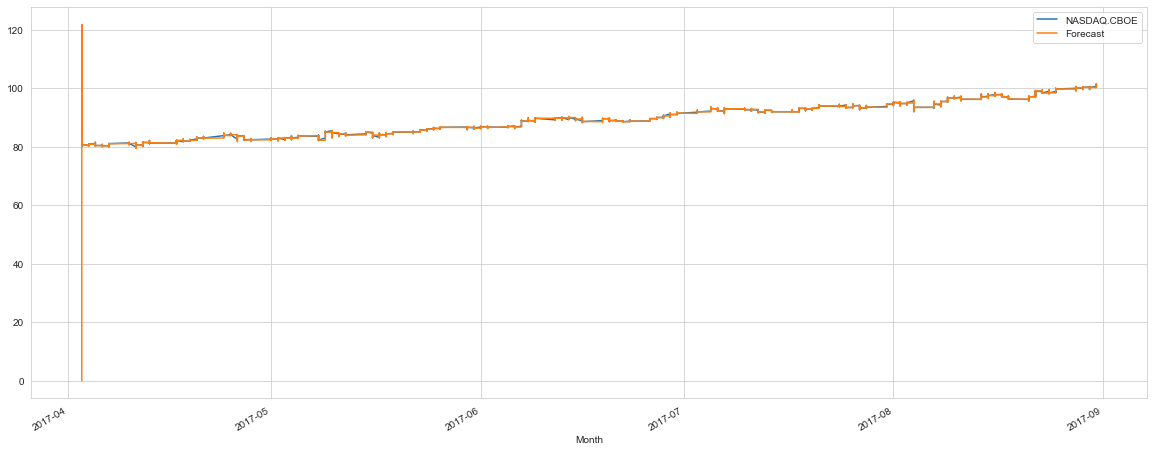

In [126]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CBOE['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0
,1,0,12))
results = model.fit()
print(results.summary())
print(results.forecast())
df_CBOE['Forecast'] = results.predict()
df_CBOE[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))
plt.show()

In [127]:
results.forecast(steps=10)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
Name: predicted_mean, dtype: float64

In [128]:
results.predict(start=41264,end=41273)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    100.8200
41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
Name: predicted_mean, dtype: float64

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))

Mean Squared Error NASDAQ.CBOE - 0.20399400195930845
Mean Absolute Error NASDAQ.CBOE - 0.0435663055962049


       Month  NASDAQ.CSCO
0 2017-04-03      33.7400
1 2017-04-03      33.8800
2 2017-04-03      33.9000
3 2017-04-03      33.8499
4 2017-04-03      33.8400
            NASDAQ.CSCO
Month                  
2017-04-03      33.7400
2017-04-03      33.8800
2017-04-03      33.9000
2017-04-03      33.8499
2017-04-03      33.8400


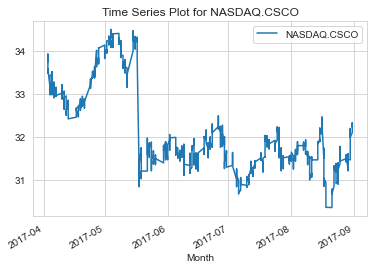

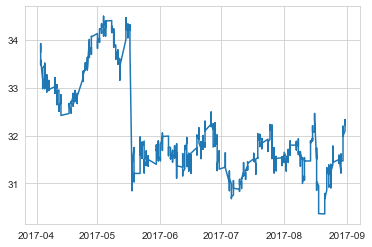

In [131]:
# Time Series ForeCasting for 'NASDAQ.CSCO'
df_CSCO = final[['Month',stock_features[3]]]
print(df_CSCO.head())
df_CSCO.set_index('Month',inplace=True)
print(df_CSCO.head())
df_CSCO.plot()
plt.title("Time Series Plot for NASDAQ.CSCO")
plt.show()
#Test Staionarity
plt.plot(df_CSCO['NASDAQ.CSCO'])

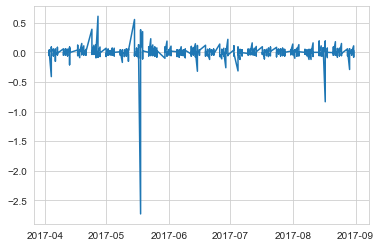

In [133]:
# Making time series
df_CSCO = df_CSCO.copy()
df_CSCO['First_Difference'] = df_CSCO['NASDAQ.CSCO'] - df_CSCO['NASDAQ.CSCO'].shift(1)
df_CSCO.dropna(inplace=True)
plt.plot(df_CSCO['First_Difference'])

<ipython-input-134-0b76ac59cf9d>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'],freq=12)


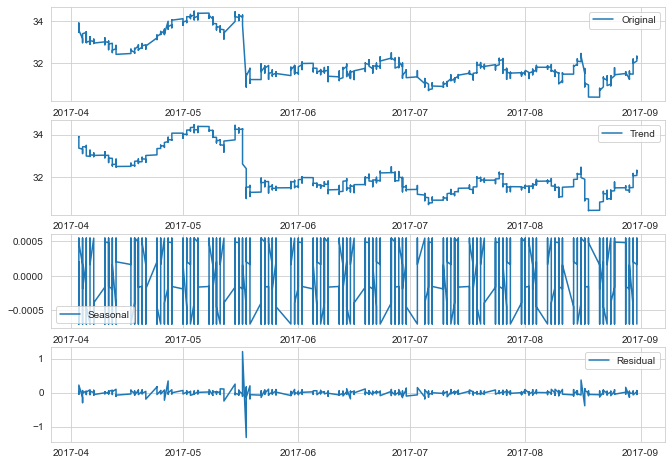

In [134]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CSCO['NASDAQ.CSCO'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

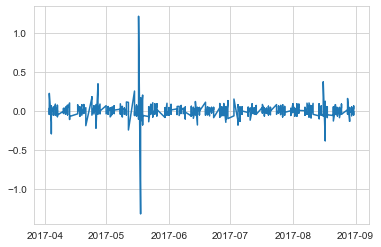

In [135]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.plot(ts_log_decompose)

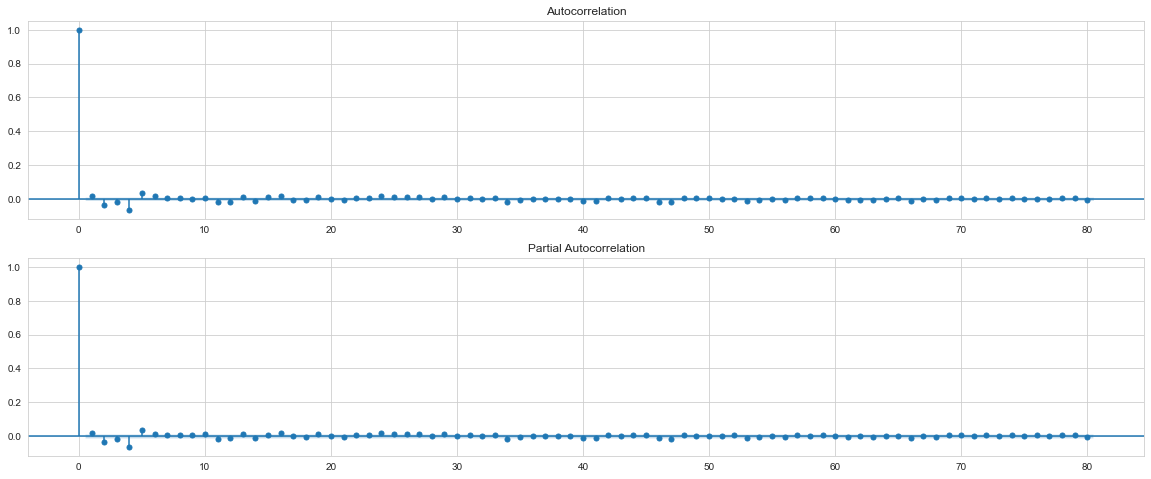

In [136]:
# Auto Corealtion and Partial Autocorelation Plots
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax2)

In [137]:
lag_acf = acf(df_CSCO['First_Difference'],nlags=80)
lag_pacf = pacf(df_CSCO['First_Difference'],nlags=80,method='ols')

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


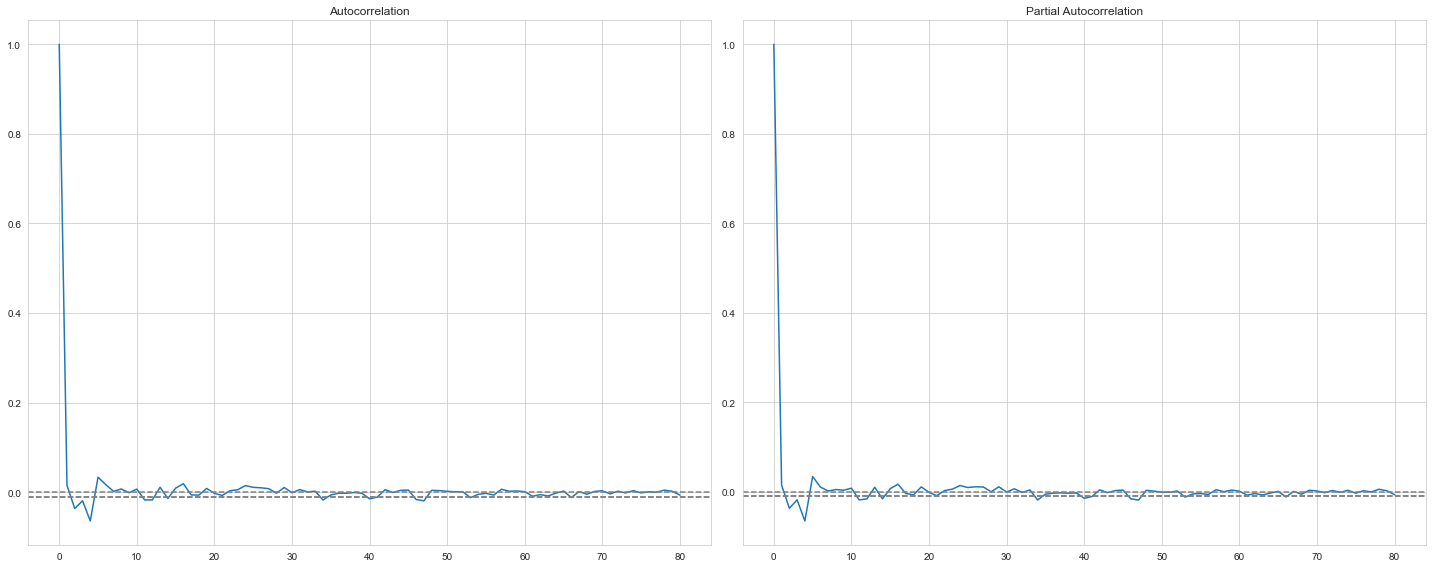

In [139]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41264
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85500.076
Date:                            Fri, 26 Mar 2021   AIC                        -170998.153
Time:                                    17:49:26   BIC                        -170989.525
Sample:                                         0   HQIC                       -170995.426
                                          - 41264                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.694      0.000       0.001       0.001
Ljung-Box (L1) (Q):                

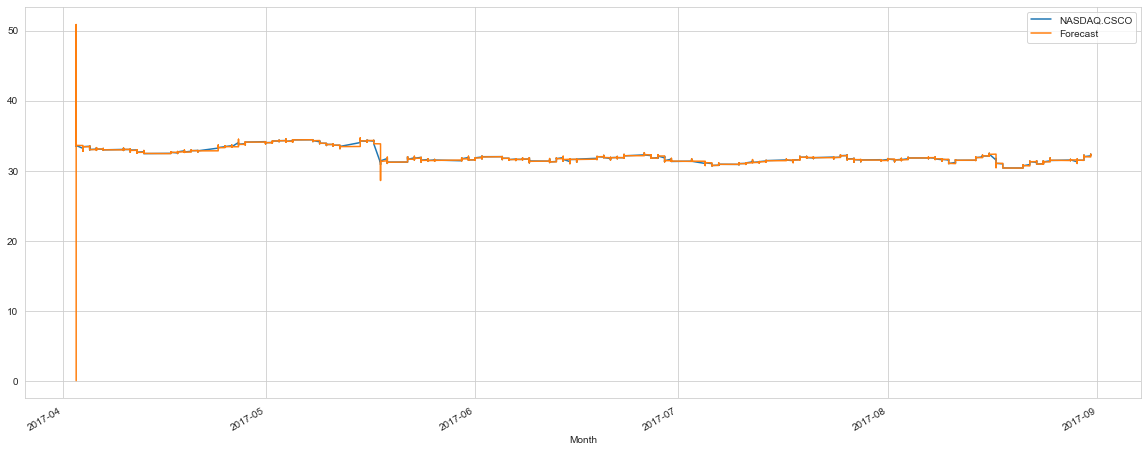

In [141]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CSCO['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0
,1,0,12))
results = model.fit()
print(results.summary())
df_CSCO['Forecast'] = results.predict()
df_CSCO[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))
plt.show()

In [142]:
df_CSCO.head()

,NASDAQ.CSCO,First_Difference,Forecast
Month,,,
2017-04-03,33.9000,0.0200,0.0000
2017-04-03,33.8499,-0.0501,33.9000
2017-04-03,33.8400,-0.0099,33.8499
2017-04-03,33.8800,0.0400,33.8400
2017-04-03,33.9000,0.0200,33.8800


In [143]:
results.forecast(steps=10)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    32.225
41265    32.190
41266    32.170
41267    32.150
41268    32.180
41269    32.170
41270    32.150
41271    32.165
41272    32.180
41273    32.180
Name: predicted_mean, dtype: float64

In [144]:
results.predict(start=41264,end=41275)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41264    32.225
41265    32.190
41266    32.170
41267    32.150
41268    32.180
41269    32.170
41270    32.150
41271    32.165
41272    32.180
41273    32.180
41274    32.175
41275    32.205
Name: predicted_mean, dtype: float64

In [145]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))

Mean Squared Error NASDAQ.CSCO - 0.035731676648268706
Mean Absolute Error NASDAQ.CSCO - 0.01577579494272978


       Month  NASDAQ.EBAY
0 2017-04-03      33.3975
1 2017-04-03      33.3950
2 2017-04-03      33.4100
3 2017-04-03      33.3350
4 2017-04-03      33.4000
            NASDAQ.EBAY
Month                  
2017-04-03      33.3975
2017-04-03      33.3950
2017-04-03      33.4100
2017-04-03      33.3350
2017-04-03      33.4000


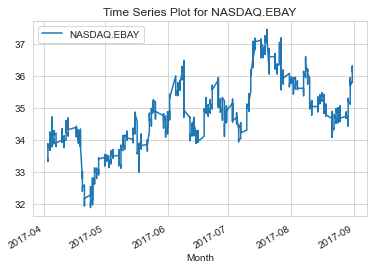

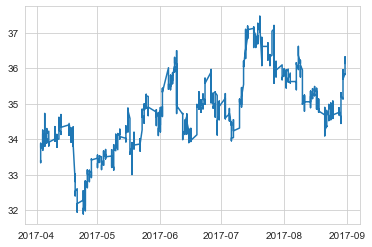

In [148]:
# Time Series Forecasting for NASDAQ.EBAY
df_EBAY = final[['Month',stock_features[4]]]
print(df_EBAY.head())
df_EBAY.set_index('Month',inplace=True)
print(df_EBAY.head())
df_EBAY.plot()
plt.title("Time Series Plot for NASDAQ.EBAY")
plt.show()
#Test Staionarity
plt.plot(df_EBAY['NASDAQ.EBAY'])

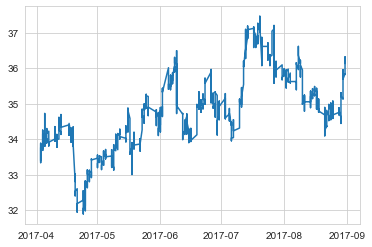

In [149]:
df_EBAY = df_EBAY.copy()
df_EBAY['First_Difference'] = df_EBAY['NASDAQ.EBAY'] - df_EBAY['NASDAQ.EBAY'].shift(1)
df_EBAY.dropna(inplace=True)
plt.plot(df_EBAY['NASDAQ.EBAY'])

<ipython-input-150-ebc5a756d62b>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'],freq=12)


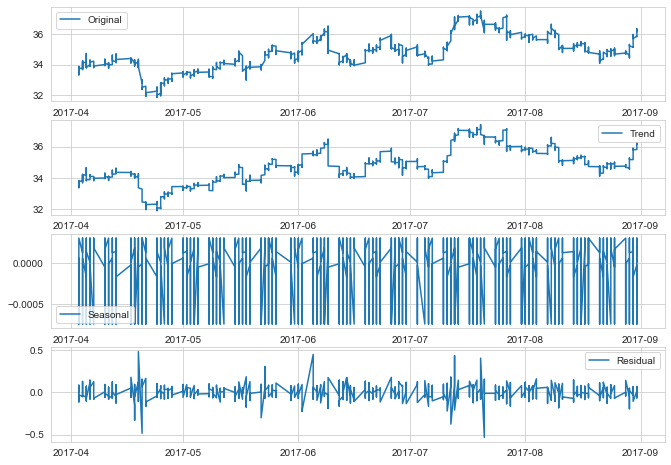

In [150]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_EBAY['NASDAQ.EBAY'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

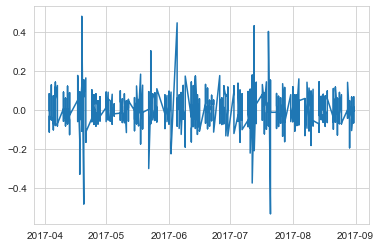

In [151]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.plot(ts_log_decompose)

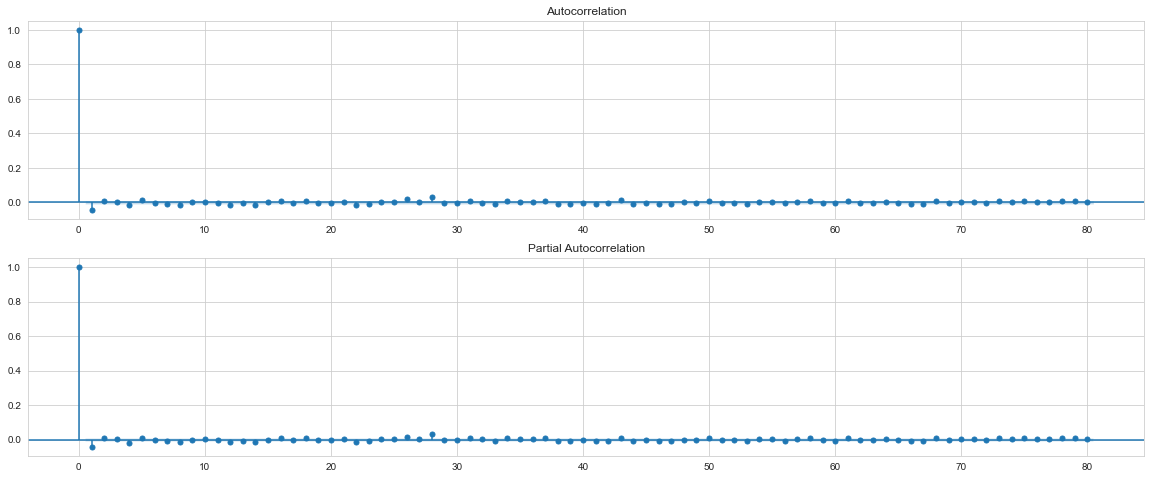

In [152]:
# Autocorealtion plot and Partial Autocorelation plots
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax2)

In [153]:
lag_acf = acf(df_EBAY['First_Difference'],nlags=80)
lag_pacf = pacf(df_EBAY['First_Difference'],nlags=80,method='ols')

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


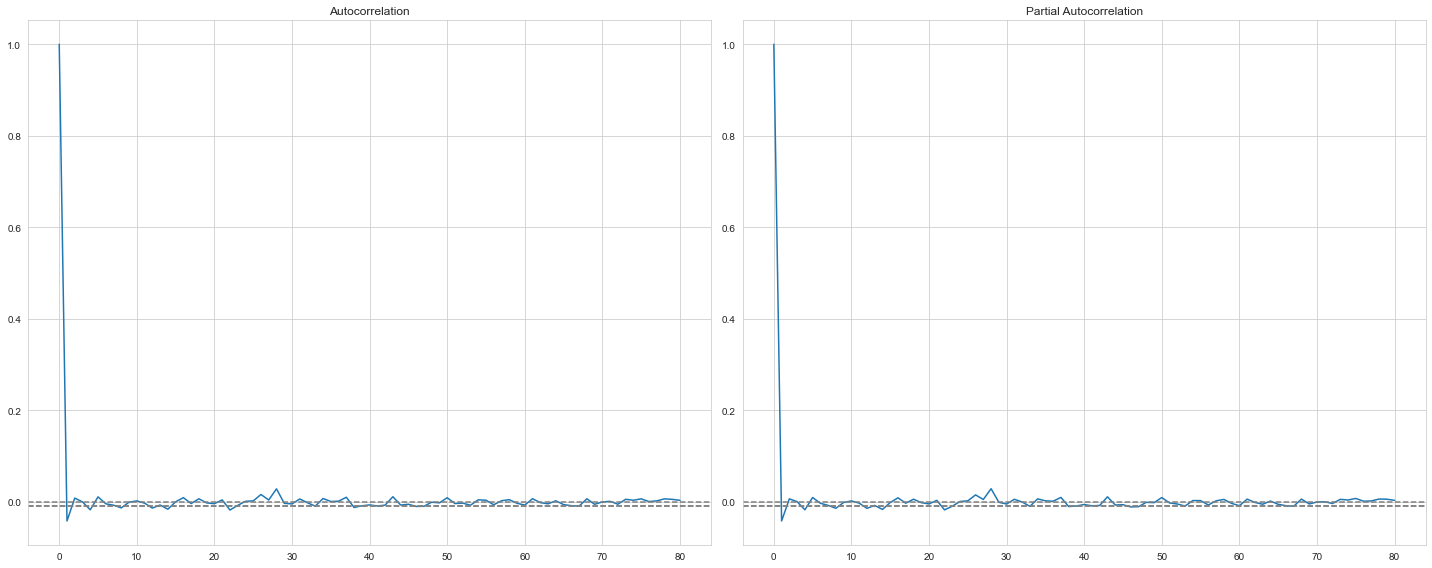

In [155]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
            
plt.tight_layout()

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82104.712
Date:                            Fri, 26 Mar 2021   AIC                        -164207.424
Time:                                    17:53:25   BIC                        -164198.797
Sample:                                         0   HQIC                       -164204.697
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.837      0.000       0.001       0.001
Ljung-Box (L1) (Q):                

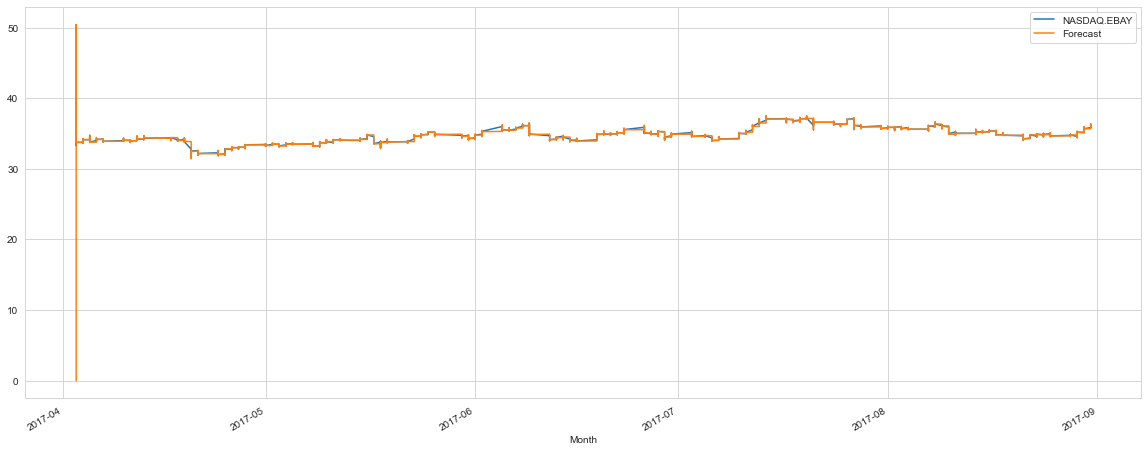

In [156]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_EBAY['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0
,1,0,12))
results = model.fit()
print(results.summary())
df_EBAY['Forecast'] = results.predict()
df_EBAY[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))
plt.show()

In [157]:
df_EBAY.head()

,NASDAQ.EBAY,First_Difference,Forecast
Month,,,
2017-04-03,33.395,-0.0025,0.000
2017-04-03,33.410,0.0150,33.395
2017-04-03,33.335,-0.0750,33.410
2017-04-03,33.400,0.0650,33.335
2017-04-03,33.430,0.0300,33.400


In [158]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))

Mean Squared Error NASDAQ.EBAY - 0.03483567894783151
Mean Absolute Error NASDAQ.EBAY - 0.021688033668816102


In [159]:
results.forecast(steps=10)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
Name: predicted_mean, dtype: float64

In [160]:
results.predict(start=41265,end=41275)

C:\Users\goodluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
41275    36.010
Name: predicted_mean, dtype: float64

In [161]:
#Conclusion-The predicted stock prices values have been stored in the the forecast columns of the each stock entity dataframe